<center><h1>Create Image Classifier Using TensorFlow 2, Amazon SageMaker, and Jupyter </h1></center>

# Problem at Hand

There are multiple Lego Images of various shapes and sizes. The goal is to train the machine so that it can recognize and classify a lego.

Images of Lego bricks are stored in numpy array files. They are divided into train and test sets.

First create a deep learning, neural network classifer model. Then, train the model using the images and test the model to see if it can correctly predict the shapes/sizes of tests images.

In [ ]:
# Import necessary libraries

import tensorflow as tf       #Version should be Tensorflow 2 or later (conda_tensorflow2_p310)
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Let's load the numpy array data.

train_images = np.load('train-images.npy')    #Training images, 80% of the data
train_labels = np.load('train-labels.npy')    #List of integer labels identifying classes of teh training images
test_images = np.load('test-images.npy')      #Testing images, 20% of the data
test_labels = np.load('test-labels.npy')      #Integer labels of testing images

In [ ]:
print(train_images[3].shape)
print(test_images[3].shape)
train_images[3]

(48, 48)
(48, 48)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02745098, 0.02745098, 0.02745098, ..., 0.02745098, 0.02745098,
        0.02745098],
       [0.03137255, 0.03137255, 0.03137255, ..., 0.03137255, 0.03137255,
        0.03137255],
       [0.02745098, 0.02745098, 0.02745098, ..., 0.02745098, 0.02745098,
        0.02745098]])

It shows that each data point is a 48x48 matrix of floating point values. Each value in the matrix is the brightness of a pixel in the image, ranging from 0 to 1. Let's plot these values to get a better picture.

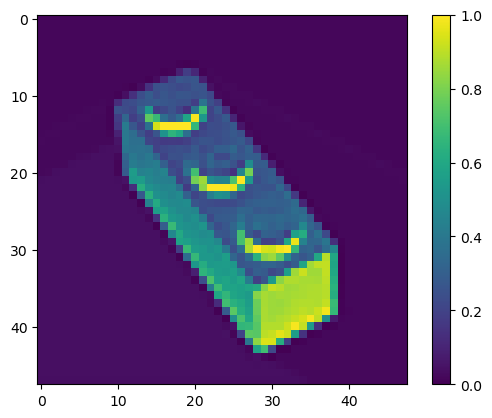

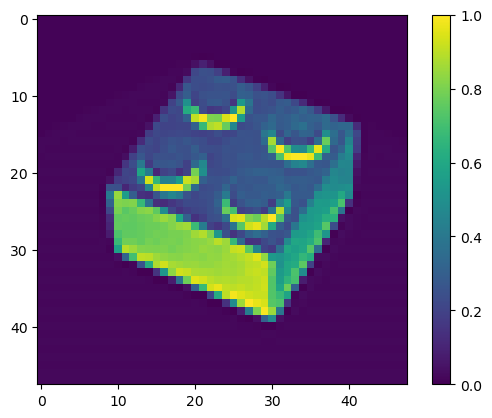

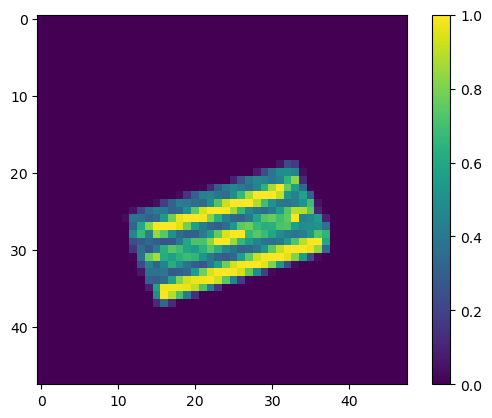

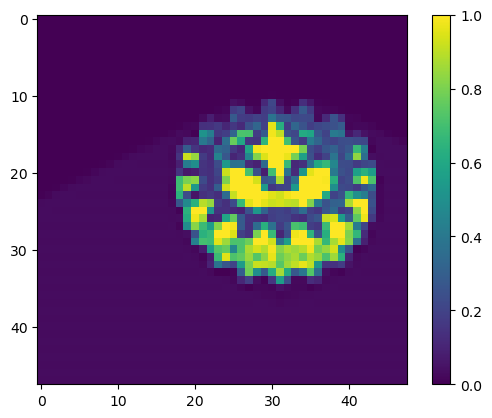

In [ ]:
plt.figure()
for i in range(4):
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.show()

In [ ]:
# Visualize the label data
print(train_labels)

[2 1 9 7 6 2 0 6 7 4 8 8 8 8 4 7 4 9 1 4 1 5 1 5 1 2 1 6 1 8 5 6 2 8 6 5 7
 7 3 7 9 3 7 8 7 6 0 9 8 9 2 5 8 7 4 2 0 3 3 4 7 2 9 7 0 3 8 2 8 3 7 1 8 6
 2 1 9 1 7 5 9 5 1 2 6 8 0 6 0 4 0 7 5 1 7 0 6 2 1 8 5 3 7 9 0 5 5 2 6 5 2
 7 3 3 8 0 5 1 3 2 6 0 3 3 2 4 2 1 7 9 7 8 9 9 1 8 6 0 2 5 2 8 7 1 2 4 9 5
 0 5 3 7 5 6 7 7 3 1 2 1 4 2 3 7 2 9 5 7 2 3 4 0 2 1 7 9 7 0 2 8 6 4 3 4 8
 9 0 3 6 1 9 4 8 1 4 3 7 3 9 6 0 6 2 8 0 1 9 6 4 3 8 7 0 2 9 8 9 0 2 8 6 9
 1 0 8 4 5 7 3 3 6 2 1 2 0 1 8 7 7 3 4 2 6 2 1 5 9 8 6 0 4 1 5 4 3 2 4 9 9
 5 2 5 4 8 8 7 5 9 8 0 6 5 3 3 2 9 2 7 0 3 3 6 2 8 1 5 5 0 8 5 7 4 1 6 3 6
 8 6 3 3 9 5 9 3 1 2 4 0 6 4 2 6 2 5 4 1 8 7 1 8 6 4 2 7 4 9 9 1 9 5 4 6 7
 3 9 1 0 0 3 2 6 4 0 4 1 4 0 6 6 7 5 9 6 5 6 3 2 4 3 1 5 6 1 7 6 9 5 7 5 0
 1 9 2 9 3 0 6 0 1 9 1 9 9 4 0 4 5 0 7 5 7 6 5 0 8 0 1 0 7 9 0 5 4 6 7 4 6
 2 6 1 3 6 9 8 8 7 0 2 1 2 9 8 0 6 0 2 4 8 7 7 9 4 2 5 6 0 7 3 0 9 1 4 4 0
 3 0 8 6 8 5 1]


In our dataset, each image is associated with a label. For instance, the first image in the training set (train_image[0]) has a label indicating it corresponds to LEGO set number 2. To enhance readability, we'll provide more descriptive labels, potentially using alternative descriptions for the real codes used by LEGO.

In [ ]:
# High level classification for easy readability and visualization
class_names = ['2x3 Brick', '2x2 Brick', '1x3 Brick', '2x1 Brick', '1x1 Brick',
               '2x2 Macaroni', '2x2 Curved End', 'Cog 16 Tooth', '1x2 Handles', '1x2 Grill']

# The LEGO codes are:
# class_names = ['3002', '3003', '3622', '3004', '3005', '3063', '47457', '94925', '3839a', '2412b']

Now we can use those more useful labels to interpret the data. Let's try reading that first image again. From reading the two cells above, you can probably predict the result:

In [ ]:
# Let's print the lebel for the first few bricks
for i in range(4):
    print(class_names[train_labels[i]])

1x3 Brick
2x2 Brick
1x2 Grill
Cog 16 Tooth


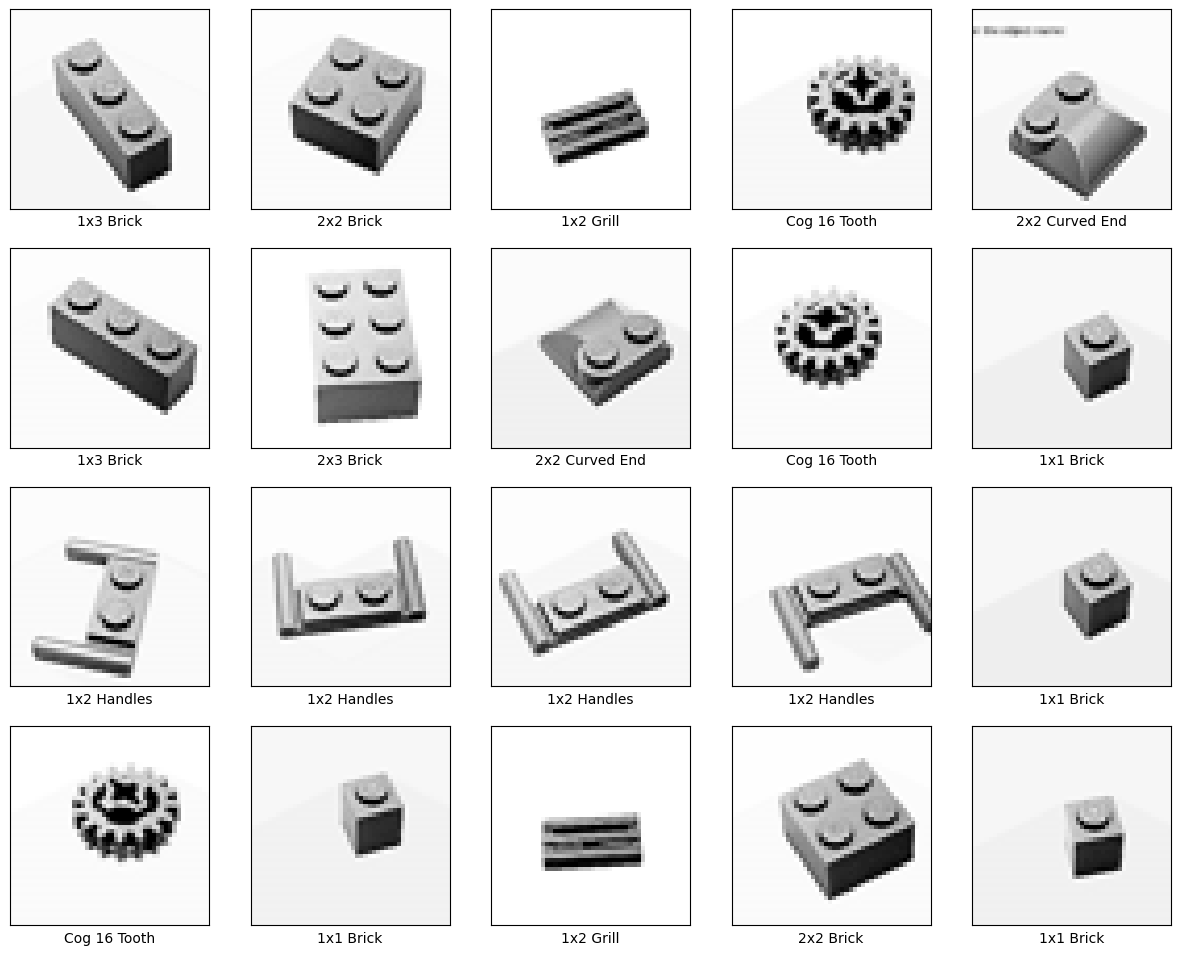

In [ ]:
# Let's visualize all the Lego images

plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Create a model
# See Readme file that describes the creation of an artificial neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48,48)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Following specifications are uesd to compile the model:

* `Adam` is the optimization algorithm, that uses a variation of stochastic gradient descent to find the best answers
* The `Spare Categorical Cross-Entropy` loss function will inform how the weights are adjusted during training since we have many different categories
* `Accuracy` will be the sole metric we rely on for the training

In [ ]:
# Let's compile the model to our specificiations
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

To train the model: we'll provide it with the training image data and labels we imported from the numpy arrays, as well the number of training epochs. Let's start with `4` epochs.

In [ ]:
# Train our model, saved into the `history` variable
# Set training epochs to '4'.
history = model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
15/15 [==============================] - 1s 6ms/step - loss: 1.9193 - accuracy: 0.4146
Epoch 2/4
15/15 [==============================] - 0s 6ms/step - loss: 0.9170 - accuracy: 0.8226
Epoch 3/4
15/15 [==============================] - 0s 6ms/step - loss: 0.5043 - accuracy: 0.8936
Epoch 4/4
15/15 [==============================] - 0s 6ms/step - loss: 0.2960 - accuracy: 0.9379


The model gets a greater accuracy score with each increasing epoch. When we trained the model, we stored the ```history``` of the training in a variable so we can draw a graph of how the training process progressed. We can plot accuracy and loss over the epochs.

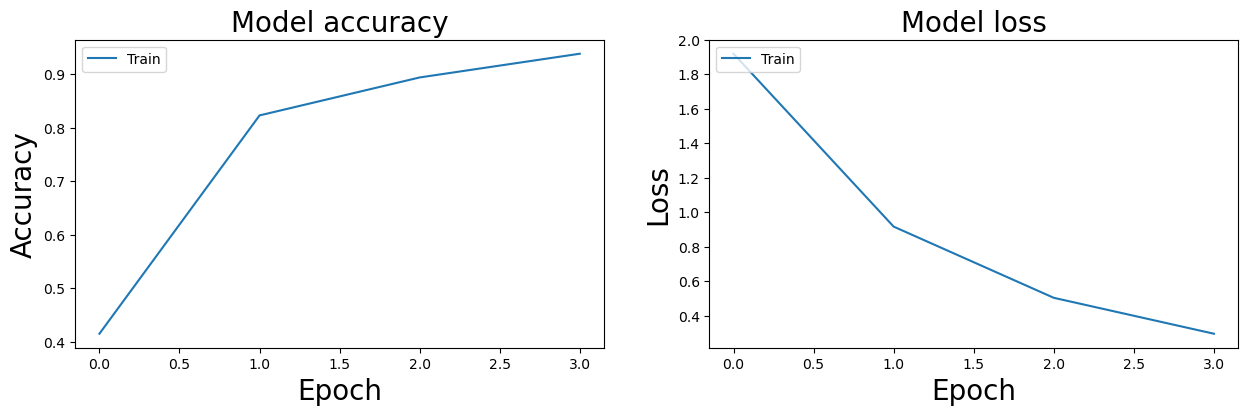

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy',fontsize='20')
plt.ylabel('Accuracy', fontsize='20')
plt.xlabel('Epoch', fontsize='20')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss', fontsize='20')
plt.ylabel('Loss', fontsize='20')
plt.xlabel('Epoch', fontsize='20')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Accuracy while training is one thing. Let's calculate accuracy against the __testing data__. If the accuracy achieved during training is much greater than what we calculate for the testing data, the model is probably overfit. This means it works well to classify training data but not testing data.

In [ ]:
# Evaluate the testing data against the model, and check the result

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.8467
Test accuracy: 0.846666693687439


It is time to make prediction of the Lego size using the testing data.

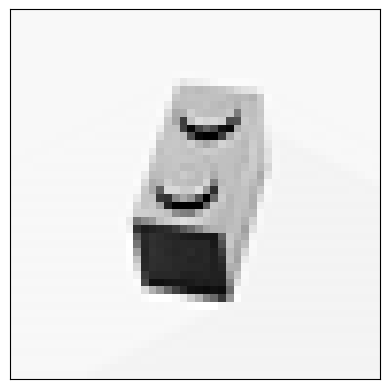

In [ ]:
# Prediction of one of the images

test_image_number = 2

img = test_images[test_image_number]
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [ ]:
# The ```predict``` method expects a collection of images, so let's create a collection of one image.
img = (np.expand_dims(img,0))
img.shape

(1, 48, 48)

The shape is now a collection of 1 piece of data that is 48x48. Next, we pass our image to the ```predict``` method. The result is a list of probabilities that the image is a certain class.

In [ ]:
# Run a prediction against our single `img`

predictions_single = model.predict(img)
predictions_single

1/1 [==============================] - 0s 48ms/step


array([[0.00188855, 0.03469916, 0.00987876, 0.76358116, 0.05971674,
        0.09842128, 0.01943725, 0.00192348, 0.00358502, 0.00686859]],
      dtype=float32)

Let's use NumPy function called `argmax` to find the index of the largest value in the list. We can use a second NumPy method to find the actual `max` value.

In [ ]:
prediction_result = np.argmax(predictions_single[0])
probability = np.max(predictions_single[0])
print(f"Predicted class {prediction_result}, which is {class_names[prediction_result]}.")
print(f"The model thinks there is a {probability*100:.2f}% probability of this brick being correct.")

Predicted class 3, which is 2x1 Brick.
The model thinks there is a 76.36% probability of this brick being correct.


In [ ]:
# Let's verify with the real test image:

class_names[test_labels[test_image_number]]

'2x1 Brick'

Bingo!

In [ ]:
# Function to display the image:
def plot_image(predictions_array, true_label, img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    predicted_probability = 100 * np.max(predictions_array)
    color = 'green' if predicted_label == true_label else 'red'
    # Print a label with 'predicted class', 'probability %', 'actual class'
    plt.xlabel(f"{class_names[predicted_label]} {predicted_probability:2.0f}% ({class_names[true_label]})",
                                color=color)

# Function to display the prediction results in a graph:
def plot_value_array(predictions_array, true_label):
    plt.xticks(range(10))
    plt.yticks([])
    plot = plt.bar(range(10), predictions_array, color="#777777")
    predicted_label = np.argmax(predictions_array)
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('green')

Let's plot a bar chart using the helper function. This gives us a sense of how well the model classified this image. The predicted label will be red if it is different than the actual label. The actual label will be green.

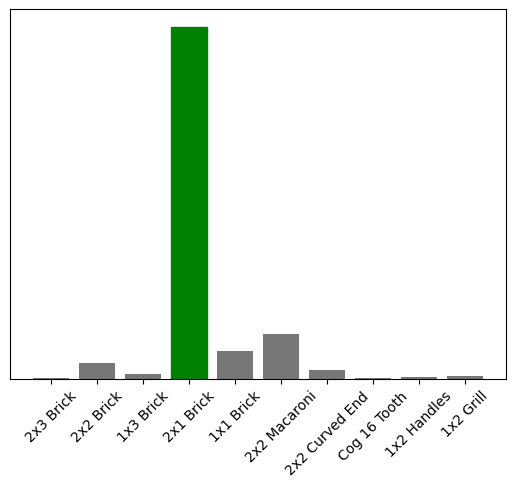

In [ ]:
plot_value_array(predictions_single[0], test_labels[test_image_number])
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
# For the Prediction of all the images:
predictions = model.predict(test_images)

5/5 [==============================] - 0s 2ms/step


In [ ]:
predictions[0]

array([1.2498174e-02, 9.6044850e-01, 1.7311492e-03, 2.0119350e-03,
       2.0496718e-06, 4.5590440e-04, 2.1621048e-02, 6.2326062e-04,
       2.2657031e-04, 3.8130744e-04], dtype=float32)

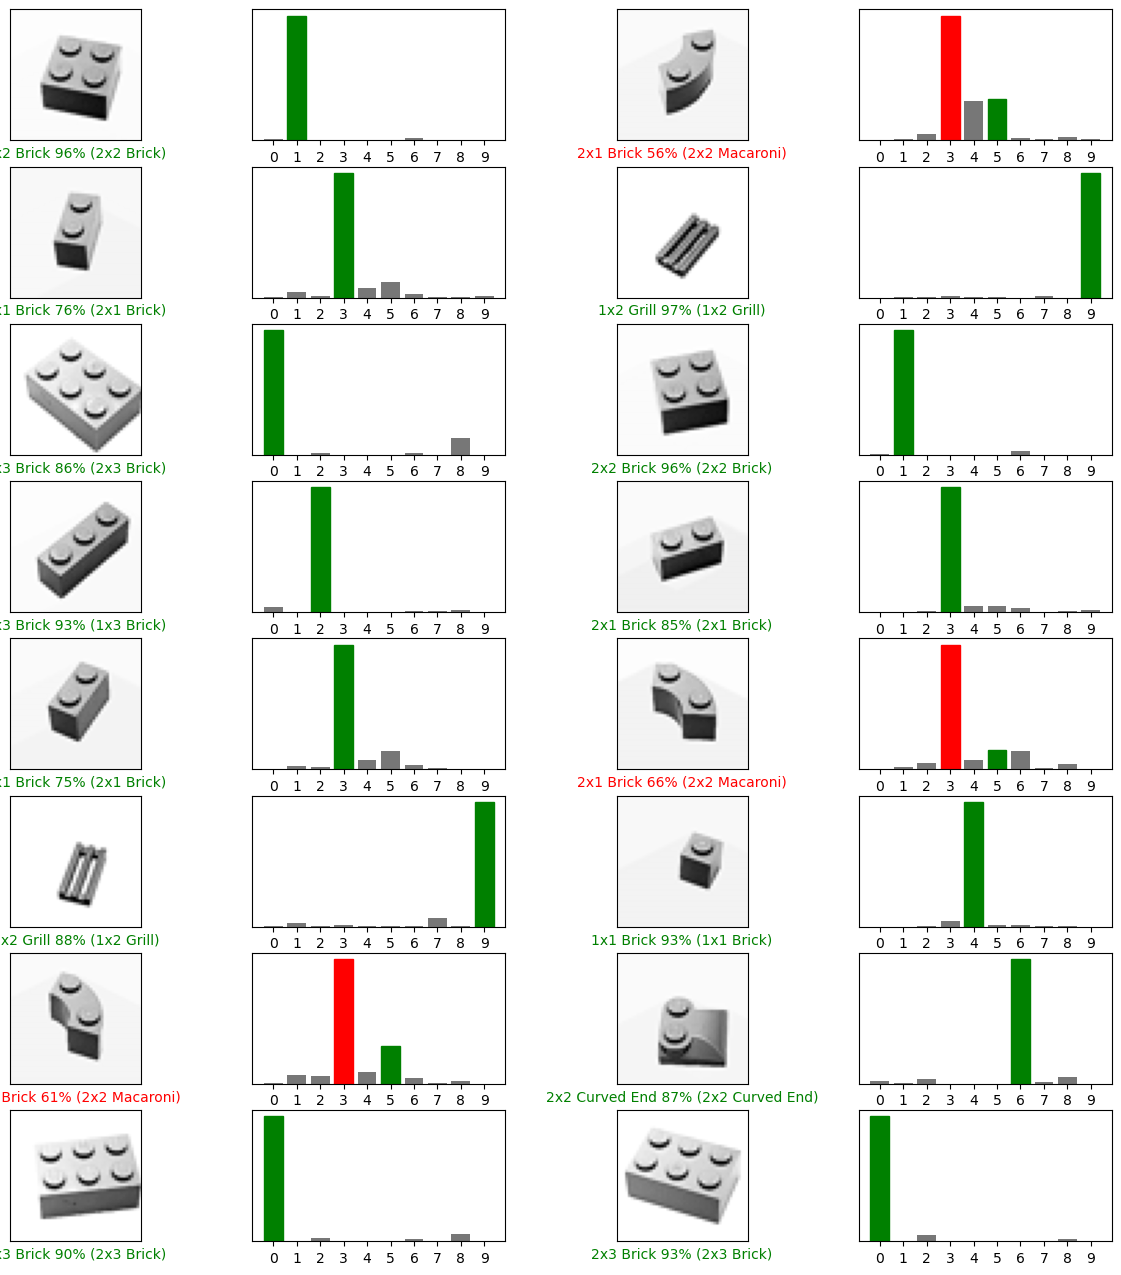

In [ ]:
# Create a 2-column figure with 8 Lego images in each:

num_rows = 8
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(15, 16))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(predictions[i], test_labels[i], test_images[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions[i], test_labels[i])
plt.show()

The model had 94% accuracy. The predicted results are Jolly Good!
Change the Epoch number to try to increase the accuracy.